In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
new_col = ['flare', 'start_date', 'start_time', 'peak', 'end', 'duration_s',
       'peak_c_s', 'total_counts', 'energy_kev', 'x_pos_asec', 'y_pos_asec',
       'radial', 'active_region_ar', 'flag_1', 'flag_2', 'flag_3', 'flag_4',
       'flag_5']
df = pd.read_csv('data/hessi.solar.flare.2002to2016.csv',sep=",")
#test_df.columns = new_col
df.head(3)

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN


In [3]:
new_df = pd.read_csv('data/hessi.solar.flare.2002to2016.csv',sep=",", index_col=0)
#new_df.columns = new_col
# process date / time columns
def parse_dt(sdatex,stimex):
    datex = datetime.strptime(sdatex, '%Y-%m-%d')
    timex = datetime.strptime(stimex, '%H:%M:%S')
    return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)
new_df['dt.start'] = new_df[['start.date','start.time']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
new_df['dt.peak'] = new_df[['start.date','peak']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
new_df['dt.end'] = new_df[['start.date','end']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
# clean columns
new_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)
# add new columns
new_df['year'] = new_df['dt.start'].apply(lambda col: col.year)
new_df['month'] = new_df['dt.start'].apply(lambda col: col.month)
new_df['day'] = new_df['dt.start'].apply(lambda col: col.day)

In [4]:
new_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [5]:
new_df = new_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'_flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})

In [6]:
new_df.head(3)

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,_flag_5,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,,,,,,,
2021213,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [7]:
DATA_by_yr = new_df.groupby(['year'])['total_counts'].sum()
DATA_by_month = new_df.groupby(['month'])['total_counts'].sum().sort_values(ascending=False)
DATA_vs_energy = new_df.groupby(['energy_kev'])['energy_kev'].count().sort_values(ascending=True)

In [8]:
data_part = new_df.iloc[1:1000, 0:4]

In [9]:
data_part.columns

Index(['duration_s', 'peak_c_s', 'total_counts', 'energy_kev'], dtype='object')

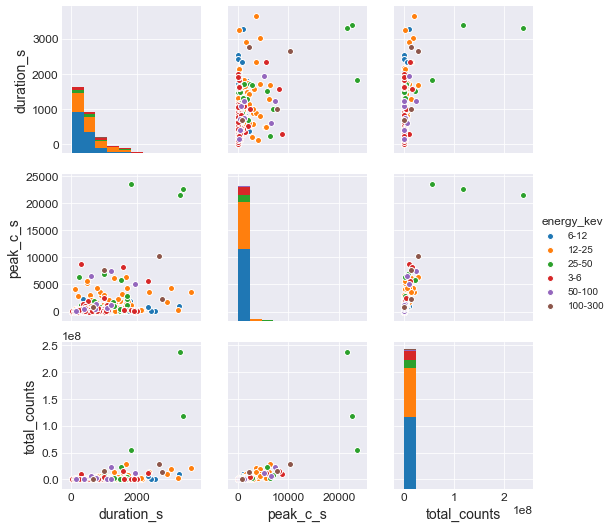

In [10]:
sns.pairplot(data=data_part, hue='energy_kev', vars=['duration_s', 'peak_c_s', 'total_counts'])

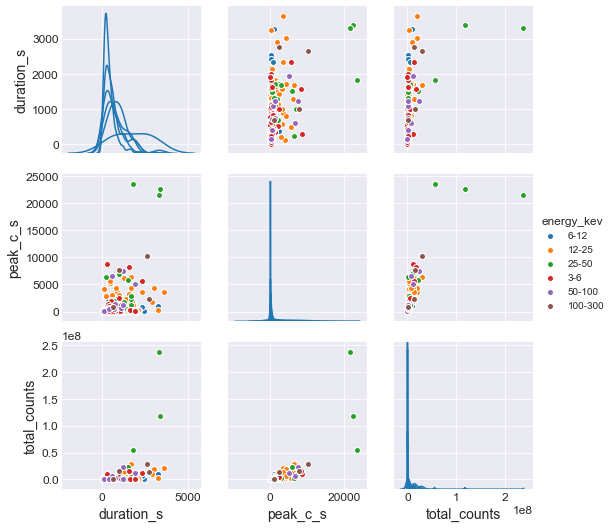

In [11]:
sns.pairplot(data=data_part, hue='energy_kev', diag_kind='kde')

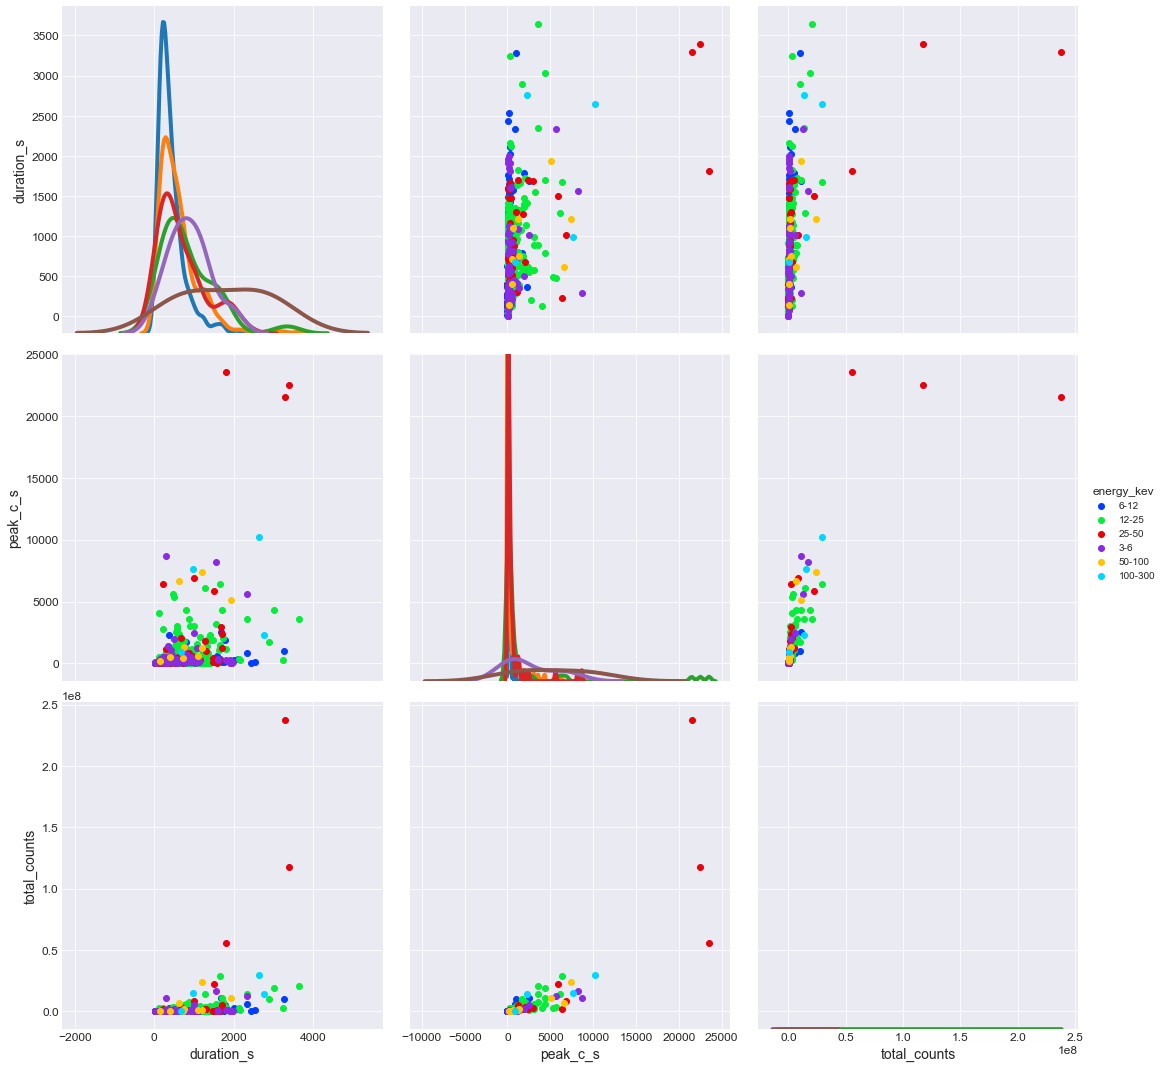

In [12]:
g =  sns.PairGrid(data_part, hue='energy_kev', palette='bright', size=5)

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs, linewidth=4)

g.map_diag(f)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

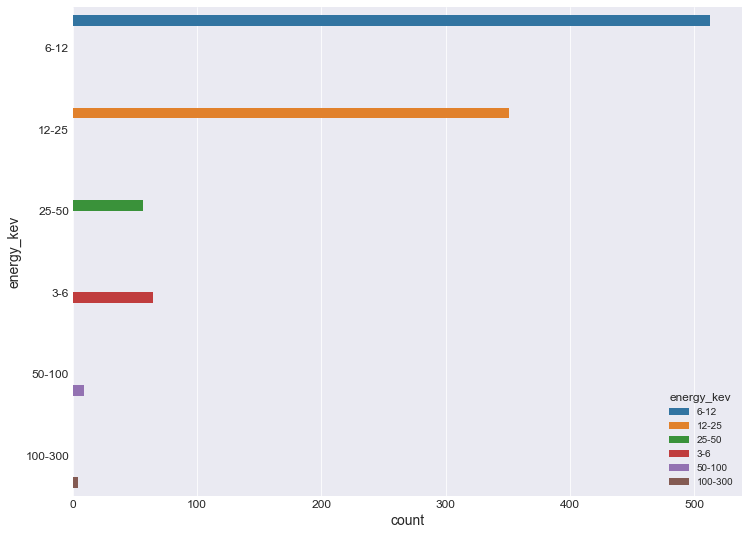

In [13]:
sns.countplot(y='energy_kev', data=data_part, hue='energy_kev')

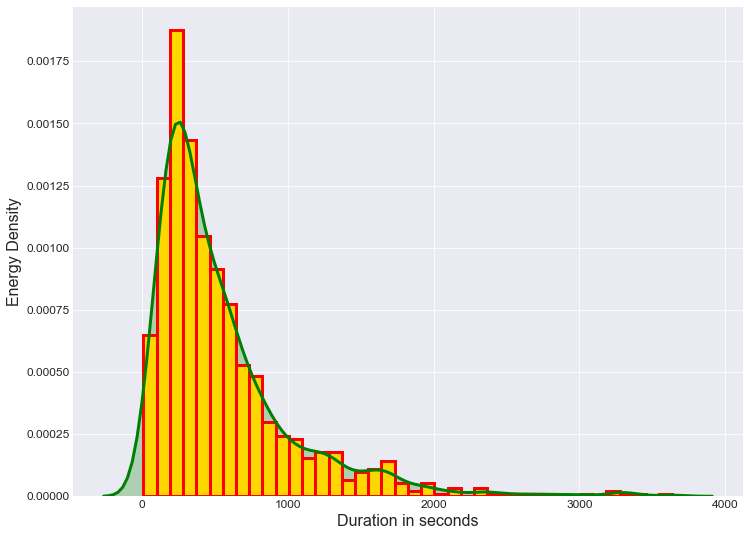

In [14]:
sns.distplot(data_part['duration_s'], kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold', edgecolor='red', lw=3))
#plt.style.use('dark_background')
plt.xlabel('Duration in seconds', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

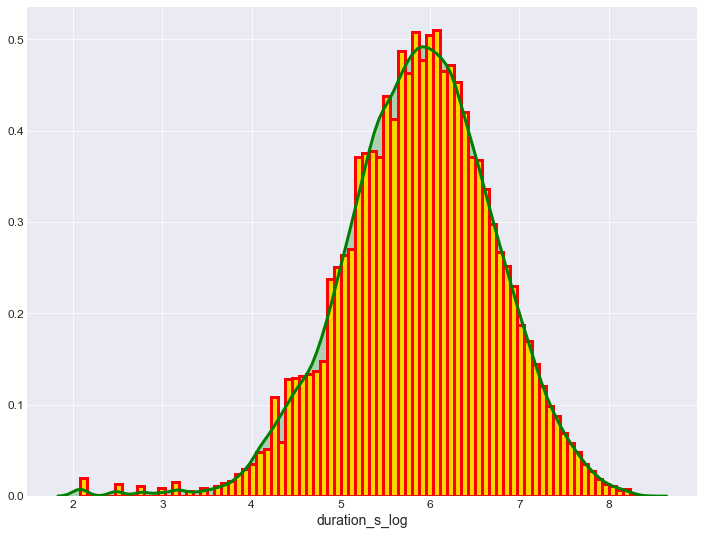

In [15]:
df['duration_s_log'] = np.log(df['duration.s'])
#plt.style.use('dark_background')
sns.distplot(df['duration_s_log'], bins=80, kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold',edgecolor='red', lw=3))

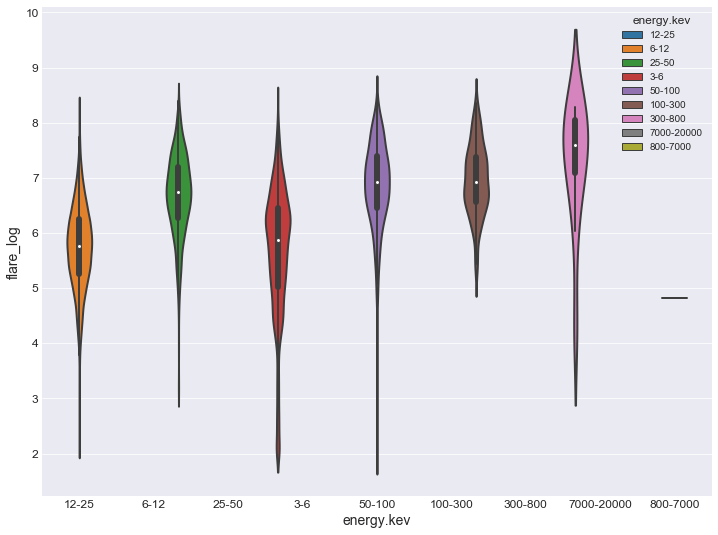

In [16]:
df['flare_log'] = np.log(df['duration.s'])
sns.violinplot(x=df['energy.kev'], y=df['flare_log'], width=3, linewidth=2, hue=df['energy.kev'])

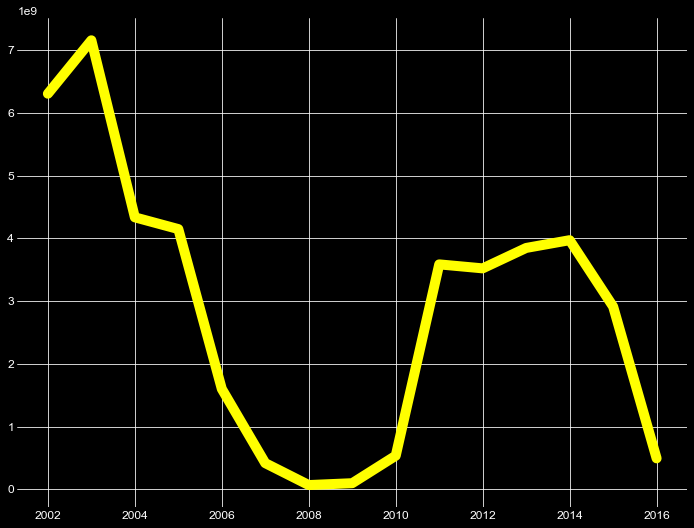

In [17]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, 'yellow', linewidth=10)

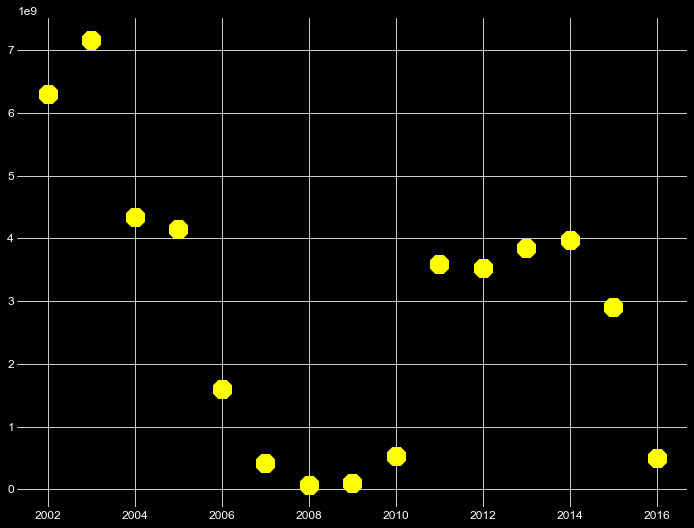

In [18]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, '8', color='yellow', markersize=20)

In [19]:
def filter_data(DATA,lwrong):
    ## filter 1: 3-16 kev
    lenght1 = len(DATA)
    DATA = DATA[DATA['energy.kev']!='3-6']
    lenght2 = len(DATA)
    if lenght1!=lenght2:
        print('filtering 3-6 kev energy range',lenght1,lenght2)

    ## filter 2: radial
    radial = DATA['radial'].values
    lenght1 = len(DATA)
    DATA = DATA[DATA['radial']<=np.percentile(radial,99)]
    lenght2 = len(DATA)
    if lenght1!=lenght2: 
        print('filtering radial',lenght1,lenght2)

    # filter possible wrong values or without solar event
    #lwrong = ['NS','SD','SS','DF','DR','ED','ES','FE','FR','FS','GD','GE','GS','MR','P0','PS','PE']
    for icod in lwrong: 
        ## filter
        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.1']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.2']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.3']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.4']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        values = DATA['flag.5'].values
        lfilter = [i for i in list(values[pd.notnull(values)]) if icod in i]
        DATA = DATA[~DATA['flag.5'].isin(lfilter)]
        lenght2 = len(DATA)
        if lenght1!=lenght2: 
            print('filtering %s'%icod,lenght1,lenght2)
            
    return DATA

In [20]:
""" DATA """
data = pd.read_csv('data/hessi.solar.flare.2002to2016.csv', sep=',')
# filtering basic
lwrong = ['NS','SD']
filtered_data = filter_data(data,lwrong)

# include energy bounday ranges
filtered_data['energy.kev.i'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[0]))
filtered_data['energy.kev.f'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[1]))
CENERGY = filtered_data[['energy.kev','energy.kev.i','energy.kev.f']].drop_duplicates(inplace=False).sort_values(['energy.kev.i'], ascending=[1], inplace=False)

filtering 3-6 kev energy range 113942 107606
filtering radial 107606 106537
filtering SD 106537 106501
filtering SD 106501 106408


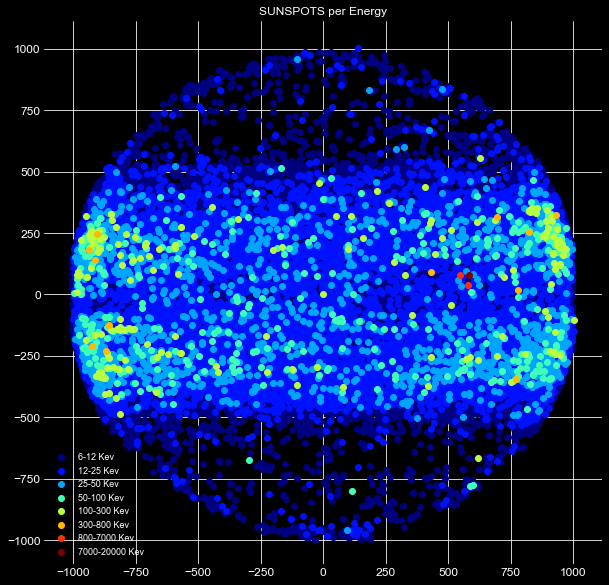

In [21]:
colors = plt.cm.jet(np.linspace(0,1,len(CENERGY['energy.kev.i'].values)))

# build figure object
fig, ax = plt.subplots(figsize=(10,10))
# loop of energy ranges
for i,irange in enumerate(CENERGY['energy.kev'].values):
    # collect data
    AUX_data = filtered_data[filtered_data['energy.kev']==irange][['x.pos.asec','y.pos.asec']]
    # scatter plot
    plt.scatter(AUX_data['x.pos.asec'].values,AUX_data['y.pos.asec'].values,color=colors[i],label='%s Kev'%irange)
    ax.legend(loc='best',fontsize=9,shadow=True)
    # clean
    del(AUX_data)
# set title
plt.title('SUNSPOTS per Energy')
# plot
plt.show()

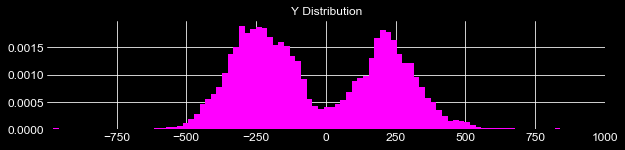

In [22]:
#plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,2))
# hist
y = filtered_data['y.pos.asec'].values
plt.hist(y, bins=np.linspace(np.min(y),np.max(y),100),normed=True,label="label var y", color='magenta')
# set limits
ax.set_xlim([np.min(y),np.max(y)])
# title
plt.title('Y Distribution')
# plot
plt.show()

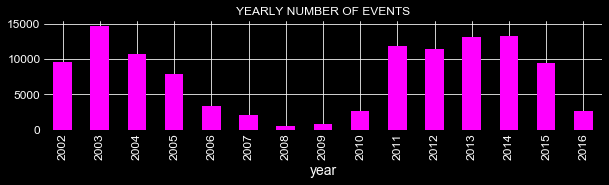

In [23]:
plt.style.use('dark_background')
new_df.groupby(['year'])['total_counts'].count().plot(kind='bar',figsize=(10,2),title='YEARLY NUMBER OF EVENTS', color='magenta')

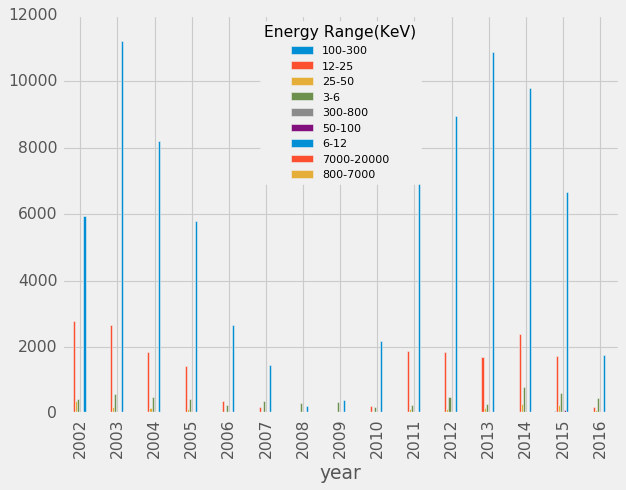

In [93]:
plt.style.use('fivethirtyeight')
new_df.groupby(['year'])['energy_kev'].value_counts().unstack().plot(kind='bar')
plt.legend(title='Energy Range(KeV)', loc='best', prop={'size': 10})

In [62]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


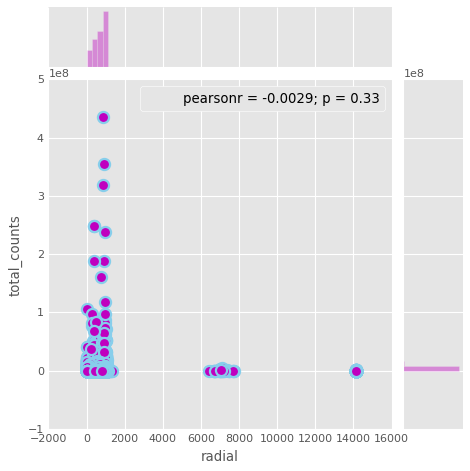

In [95]:
plt.style.use('ggplot')
sns.jointplot(x=new_df['radial'], y=new_df['total_counts'], color='m', kind='scatter', s=100, edgecolor="skyblue", linewidth=2)

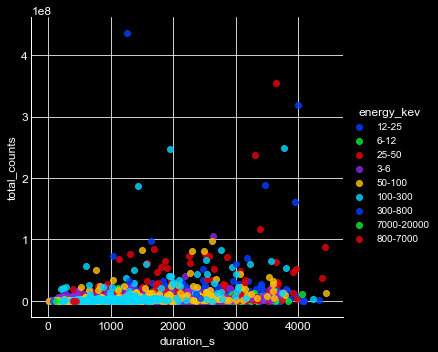

In [26]:
plt.style.use('dark_background')
sns.lmplot(x='duration_s', y='total_counts', hue='energy_kev', fit_reg=False, legend=True, data=new_df, palette='bright')

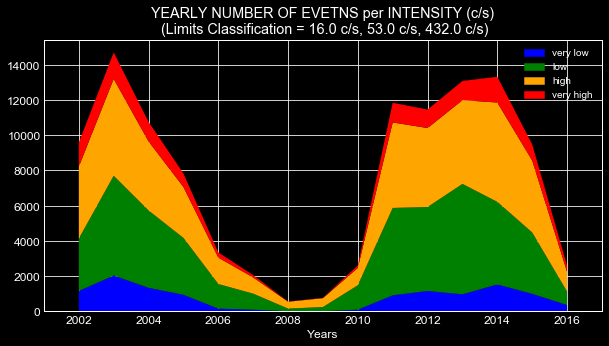

In [27]:
""" number of events per year and intensity ranges """

# calculate limits of intensity ranges
intensity = new_df['peak_c_s'].values
p10 = np.percentile(intensity,10)
p50 = np.percentile(intensity,50)
p90 = np.percentile(intensity,90)

# plot average of events intensity per year
PI0 = new_df[(new_df['peak_c_s']<=p10)].groupby(['year'])['peak_c_s'].count()
PI1 = new_df[(new_df['peak_c_s']>p10) & (new_df['peak_c_s']<=p50)].groupby(['year'])['peak_c_s'].count()
PI2 = new_df[(new_df['peak_c_s']>p50) & (new_df['peak_c_s']<=p90)].groupby(['year'])['peak_c_s'].count()
PI3 = new_df[(new_df['peak_c_s']>p90)].groupby(['year'])['peak_c_s'].count()
PI = pd.DataFrame({'year':PI0.index.values,'very low':PI0.values,'low':PI1.values,'high':PI2.values,'very high':PI3.values})

import matplotlib.patches as mpatches
# build figure object
fig, ax = plt.subplots(figsize=(10,5))

# collect data
ind = PI0.index.values
y0 = PI0.values
y1 = PI1.values
y2 = PI2.values
y3 = PI3.values
# plot
ax.stackplot(ind, y0, y1, y2, y3, colors=['blue','green','orange','red'])
# set limits
ax.set_xlim([ind[0]-1,ind[-1]+1])
# set legend
ax.legend([mpatches.Patch(color='blue'),  
            mpatches.Patch(color='green'),
            mpatches.Patch(color='orange'),
            mpatches.Patch(color='red')], 
           ['very low','low','high','very high'])

# set label
ax.set_xlabel('Years')
# set title
ax.set_title('YEARLY NUMBER OF EVETNS per INTENSITY (c/s)\n (Limits Classification = %s c/s, %s c/s, %s c/s)'%(p10,p50,p90))
# plot
plt.show()

In [28]:
predicting_df = df.copy(deep=True)
#predicting_df.columns=new_col
predicting_df.head(3)

predicting_df['dt.start'] = predicting_df[['start.date','start.time']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
predicting_df['dt.peak'] = predicting_df[['start.date','peak']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
predicting_df['dt.end'] = predicting_df[['start.date','end']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
# clean columns
predicting_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)
# add new columns
predicting_df['year'] = predicting_df['dt.start'].apply(lambda col: col.year)
predicting_df['month'] = predicting_df['dt.start'].apply(lambda col: col.month)
predicting_df['day'] = predicting_df['dt.start'].apply(lambda col: col.day)

In [29]:
predicting_df.columns

Index(['flare', 'duration.s', 'peak.c/s', 'total.counts', 'energy.kev',
       'x.pos.asec', 'y.pos.asec', 'radial', 'active.region.ar', 'flag.1',
       'flag.2', 'flag.3', 'flag.4', 'flag.5', 'duration_s_log', 'flare_log',
       'dt.start', 'dt.peak', 'dt.end', 'year', 'month', 'day'],
      dtype='object')

In [30]:
predicting_df = predicting_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})
predicting_df.head(3)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,...,flag_4,flag_5,duration_s_log,flare_log,date_start,date_peak,date_end,year,month,day
0,2021213,712,136,167304,12-25,592,-358,692,0,A1,...,NaN,NaN,6.568078,6.568078,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
1,2021228,288,7,9504,6-12,604,-341,694,9811,A1,...,Q1,NaN,5.662960,5.662960,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2,2021332,216,15,11448,6-12,-310,375,487,9825,A1,...,NaN,NaN,5.375278,5.375278,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [31]:
predicting_df = predicting_df.drop(['flag_1', 'flag_2', 'flag_3', 'flag_4', 'flag_5'], axis=1)

In [32]:
predicting_df = predicting_df.drop(['date_start', 'date_peak', 'date_end'], axis=1)

In [33]:
predicting_df.isnull().any()

flare               False
duration_s          False
peak_c_s            False
total_counts        False
energy_kev          False
x_pos_asec          False
y_pos_asec          False
radial              False
active_region_ar    False
duration_s_log      False
flare_log           False
year                False
month               False
day                 False
dtype: bool

In [34]:
predicting_df.isnull().sum()

flare               0
duration_s          0
peak_c_s            0
total_counts        0
energy_kev          0
x_pos_asec          0
y_pos_asec          0
radial              0
active_region_ar    0
duration_s_log      0
flare_log           0
year                0
month               0
day                 0
dtype: int64

In [35]:
predicting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 14 columns):
flare               113942 non-null int64
duration_s          113942 non-null int64
peak_c_s            113942 non-null int64
total_counts        113942 non-null int64
energy_kev          113942 non-null object
x_pos_asec          113942 non-null int64
y_pos_asec          113942 non-null int64
radial              113942 non-null int64
active_region_ar    113942 non-null int64
duration_s_log      113942 non-null float64
flare_log           113942 non-null float64
year                113942 non-null int64
month               113942 non-null int64
day                 113942 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 12.2+ MB


In [36]:
dt = predicting_df['energy_kev'].astype('category')
dict(enumerate((dt.cat.categories)))

{0: '100-300',
 1: '12-25',
 2: '25-50',
 3: '3-6',
 4: '300-800',
 5: '50-100',
 6: '6-12',
 7: '7000-20000',
 8: '800-7000'}

In [37]:
predicting_df['energy_kev'] = dt.cat.codes

In [38]:
predicting_df.head(5)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,duration_s_log,flare_log,year,month,day
0,2021213,712,136,167304,1,592,-358,692,0,6.568078,6.568078,2002,2,12
1,2021228,288,7,9504,6,604,-341,694,9811,5.662960,5.662960,2002,2,12
2,2021332,216,15,11448,6,-310,375,487,9825,5.375278,5.375278,2002,2,13
3,2021308,244,20,17400,1,-277,378,469,9822,5.497168,5.497168,2002,2,13
4,2021310,236,336,313392,2,-272,390,476,9825,5.463832,5.463832,2002,2,13


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(predicting_df, test_size=0.2)

In [40]:
X_train.shape, X_test.shape

((91153, 14), (22789, 14))

In [41]:
y_train = X_train['energy_kev']
X_train = X_train.drop(['energy_kev'], axis=1)

In [42]:
y_test = X_test['energy_kev']
X_test = X_test.drop(['energy_kev'], axis=1)

In [43]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_score = linear_regression.score(X_test, y_test)
linear_regression_score_train = linear_regression.score(X_train, y_train)
linear_regression_score, linear_regression_score_train

(0.20204508170967525, 0.19322052101237963)

In [44]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, y_test)
logistic_regression_score_train = logistic_regression.score(X_train, y_train)
logistic_regression_score, logistic_regression_score_train

(0.78608100399315461, 0.7854815529933189)

In [45]:
from sklearn import metrics
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test, logistic_regression_predictions))
print(metrics.precision_recall_fscore_support(y_test, logistic_regression_predictions, average='micro'))


Classification report on full data set:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        31
          1       0.64      0.21      0.31      3871
          2       0.00      0.00      0.00       365
          3       0.94      0.17      0.28      1307
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00        78
          6       0.79      0.99      0.88     17134
          8       0.00      0.00      0.00         1

avg / total       0.76      0.79      0.73     22789

(0.78608100399315461, 0.78608100399315461, 0.78608100399315461, None)


In [46]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_score = decision_tree_classifier.score(X_test, y_test)
decision_tree_score_train = decision_tree_classifier.score(X_train, y_train)
decision_tree_score, decision_tree_score_train

(0.81912326122251966, 1.0)

In [47]:
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test, decision_tree_predictions))
print(metrics.precision_recall_fscore_support(y_test, decision_tree_predictions, average='micro'))


Classification report on full data set:
             precision    recall  f1-score   support

          0       0.12      0.16      0.14        31
          1       0.51      0.52      0.51      3871
          2       0.12      0.13      0.13       365
          3       1.00      1.00      1.00      1307
          4       0.00      0.00      0.00         2
          5       0.10      0.10      0.10        78
          6       0.90      0.89      0.90     17134
          8       0.00      0.00      0.00         1

avg / total       0.82      0.82      0.82     22789

(0.81912326122251966, 0.81912326122251966, 0.81912326122251977, None)


In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_score = random_forest_classifier.score(X_test, y_test)
random_forest_score_train = random_forest_classifier.score(X_train, y_train)
random_forest_score, random_forest_score_train

(0.86309184255561899, 0.9936041600386164)

In [49]:
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test, random_forest_predictions))
print(metrics.precision_recall_fscore_support(y_test, random_forest_predictions, average='micro'))


Classification report on full data set:
             precision    recall  f1-score   support

          0       0.47      0.23      0.30        31
          1       0.63      0.58      0.60      3871
          2       0.24      0.04      0.07       365
          3       1.00      1.00      1.00      1307
          4       0.00      0.00      0.00         2
          5       0.22      0.03      0.05        78
          6       0.90      0.94      0.92     17134
          8       0.00      0.00      0.00         1

avg / total       0.85      0.86      0.85     22789

(0.86304796173592524, 0.86304796173592524, 0.86304796173592524, None)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier().fit(X_train, y_train)
kneighbors_predictions = kneighbors_classifier.predict(X_test)
kneighbors_score = kneighbors_classifier.score(X_test, y_test)
kneighbors_score_train = kneighbors_classifier.score(X_train, y_train)
kneighbors_score, kneighbors_score_train

(0.76220983807977538, 0.8248329731330839)

In [51]:
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test, kneighbors_predictions))
print(metrics.precision_recall_fscore_support(y_test, kneighbors_predictions, average='micro'))


Classification report on full data set:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        31
          1       0.45      0.42      0.43      3871
          2       0.10      0.03      0.05       365
          3       0.49      0.25      0.33      1307
          4       0.00      0.00      0.00         2
          5       0.13      0.03      0.04        78
          6       0.84      0.90      0.87     17134
          8       0.00      0.00      0.00         1

avg / total       0.74      0.76      0.75     22789

(0.76220983807977538, 0.76220983807977538, 0.76220983807977538, None)


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_classifier = GradientBoostingClassifier().fit(X_train, y_train)
gradient_classifier_predictions = gradient_classifier.predict(X_test)
gradient_classifier_score = gradient_classifier.score(X_test, y_test)
gradient_classifier_score_train = gradient_classifier.score(X_train, y_train)
gradient_classifier_score, gradient_classifier_score_train

(0.87156084075650531, 0.87526466490406241)

In [53]:
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test, gradient_classifier_predictions))
print(metrics.precision_recall_fscore_support(y_test, gradient_classifier_predictions, average='micro'))


Classification report on full data set:
             precision    recall  f1-score   support

          0       0.40      0.19      0.26        31
          1       0.69      0.53      0.60      3871
          2       0.54      0.04      0.07       365
          3       1.00      1.00      1.00      1307
          4       0.00      0.00      0.00         2
          5       0.14      0.04      0.06        78
          6       0.89      0.96      0.93     17134
          8       0.00      0.00      0.00         1

avg / total       0.86      0.87      0.86     22789

(0.87156084075650531, 0.87156084075650531, 0.87156084075650531, None)


In [54]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,10)).fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
mlp_score = mlp_classifier.score(X_test, y_test)
mlp_score_train = mlp_classifier.score(X_train, y_train)
mlp_score, mlp_score_train

(0.75185396463205934, 0.75215297357190658)

In [55]:
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test, mlp_predictions))
print(metrics.precision_recall_fscore_support(y_test, mlp_predictions, average='micro'))


Classification report on full data set:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        31
          1       0.00      0.00      0.00      3871
          2       0.00      0.00      0.00       365
          3       0.00      0.00      0.00      1307
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00        78
          6       0.75      1.00      0.86     17134
          8       0.00      0.00      0.00         1

avg / total       0.57      0.75      0.65     22789

(0.75185396463205934, 0.75185396463205934, 0.75185396463205934, None)
